In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [3]:
df = pd.read_csv('../raw_data/csv/df.csv')
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
# df = df[(df['order_purchase_timestamp'] >= '2017-01-01') & (df['order_purchase_timestamp'] <= '2018-07-31' )]
df = df[(df['order_purchase_timestamp'] >= '2017-01-01')]

df = df.set_index('order_purchase_timestamp').sort_index()

df_daily = pd.DataFrame(df.resample('D')['payment_value'].sum()).reset_index()

df_monthly = pd.DataFrame(df.resample('M')['payment_value'].sum()).reset_index()


# reviews = data['order_reviews'].copy()
reviews = pd.read_csv('../raw_data/csv/reviews.csv')
# handle datetime
reviews['review_creation_date'] = pd.to_datetime(reviews['review_creation_date'])
reviews.set_index('review_creation_date', inplace=True)

# orders = data['orders'].copy()

# orders = pd.read_csv('s3://olistdashdb/csv/orders.csv')
orders=pd.read_csv('../raw_data/csv/orders.csv')
orders = orders.query("order_status=='delivered'").reset_index()
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
# orders = orders[(orders['order_purchase_timestamp'] >= '2017-01-01') & (orders['order_purchase_timestamp'] <= '2018-07-31' )]
orders = orders[(orders['order_purchase_timestamp'] >= '2017-01-01')]
orders['delay_vs_expected'] = (orders['order_estimated_delivery_date'] - orders['order_delivered_customer_date']) / np.timedelta64(24, 'h')
def handle_delay(x):
    if x < 0:
        return abs(x)
    else:
        return 0
    
orders.loc[:,'delay_vs_expected'] = orders['delay_vs_expected'].apply(handle_delay)
orders['wait_time'] = (orders['order_delivered_customer_date'] - orders['order_purchase_timestamp']) / np.timedelta64(24, 'h')

In [28]:
pd.DataFrame(reviews['review_score'].value_counts())

KeyError: 'index'

In [20]:
pd.DataFrame(reviews['review_score'].value_counts()).reset_index()[:5]

,index,review_score
0,5,57420
1,4,19200
2,1,11858
3,3,8287
4,2,3235


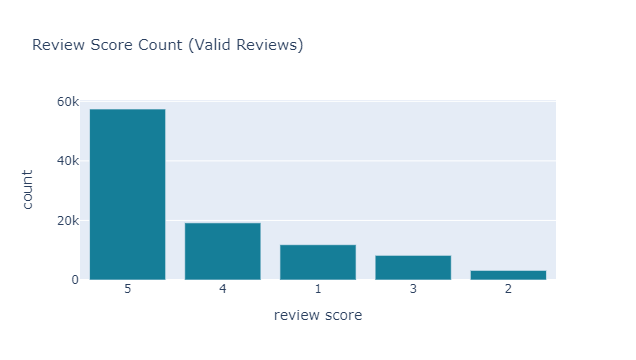

In [25]:
fig = go.Figure()
fig.add_trace(
        go.Bar(
            x=pd.DataFrame(reviews['review_score'].value_counts()).reset_index()[:5]['index'],
            y=pd.DataFrame(reviews['review_score'].value_counts()).reset_index()[:5]['review_score'],
            marker_color='#157E98'
        )
    )
fig.update_layout(
        title_text="Review Score Count (Valid Reviews)",
        title_font_size=15,
        # margin={
        #     "r": 30,
        #     "t": 30,
        #     "b": 30,
        #     "l": 30,
        # },
        )
fig.update_xaxes(title_text= 'review score')
fig.update_yaxes(title_text= 'count')
fig.show()